In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
from scipy import stats
from scipy import signal

In [2]:
# Pathways
source = r"E:\Downloads\ManducaMultiSenseData\Centroids_Filtered"
figpath = r"E:\Downloads\ManducaMultiSenseData\Motion\Tortuosity"

In [3]:
csv_list = glob.glob(source + '/*_*.csv')
len(csv_list)

971

In [4]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

In [5]:
mean_list = []
std_list = []
visit_list = []
name_list = []
chunk = 40
trouble = []
for ele in csv_list:
    df = pd.read_csv(ele)
   
    visit = df.VisitNumber[0]
    visit_list.append(visit)
    x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values
    


    
    
    
    x_, N_, fft_ = Tortuosity(x, time)
    y_, N__, fft__ = Tortuosity(y, time)
    sum_ = ((2.0/N__ * np.abs(fft__[0:N__//2])) + (2.0/N_ * np.abs(fft_[0:N_//2])))
    
#     plt.figure(figsize=(10,6))
    
#     plt.title(ele[54:-4] + " chunk size is entire visit")
#     plt.ylim(0,15)
#     plt.ylabel("Amplitude (cm)")
#     plt.xlabel("Frequency (Hz)")
    
#     plt.plot(x_, sum_, "o")
    
#     plt.savefig(figpath + "/Entire_" + ele[54:-4] + ".png")
    
    n = np.arange(0,len(x)-chunk,1)
    ratio_list = []
#     plt.figure(figsize=(10,6))
    sum_count = chunk//2*[0]

    for element in n:


        shortest_path = np.sqrt((x[element+chunk]-x[element])**2 + (y[element+chunk]-y[element])**2)


        actual_list = 0
        i = 0
        while i < len(x[element:element+chunk]):



            actual_path = np.sqrt((x[element:element+chunk+1][i+1]-x[element:element+chunk+1][i])**2 + (y[element:element+chunk+1][i+1]-y[element:element+chunk+1][i])**2)
            actual_list += actual_path



            i +=1
        
        
        
        
    
        
        

        xf, Nx, fftx = Tortuosity(x[element:element+chunk], time[element:element+chunk])
        yf, Ny, ffty = Tortuosity(y[element:element+chunk], time[element:element+chunk])
        sum_xy = ((2.0/Ny * np.abs(ffty[0:Ny//2])) + (2.0/Nx * np.abs(fftx[0:Nx//2])))
        sum_count += sum_xy
#         plt.title(ele[54:-4] + " chunk size is 40 frames - 10 wingbeats")
#         plt.ylim(0,15)
#         plt.ylabel("Amplitude (cm)")
#         plt.xlabel("Frequency (Hz)")
#         plt.plot(xf, sum_xy, "o", ms = 6, alpha = 0.3)
        
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
    
    
#     plt.plot(xf, sum_count/(element+1), c = "c")
    name_list.append(ele[54:-4])
    finite = np.asarray(ratio_list)[~np.isinf(ratio_list)]
    mean = np.mean(finite)
    std = np.std(finite)
    mean_list.append(mean)
    std_list.append(std)
    
    if ~np.isfinite(np.mean(ratio_list)) or len(finite) < (200-chunk):
        trouble.append((ele[54:-4], csv_list.index(ele), len(x), len(np.asarray(ratio_list)[~np.isfinite(ratio_list)])))
        
#     plt.savefig(figpath + "/" + ele[54:-4] + ".png")


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars


In [6]:
mean_list

[16.326245876875067,
 23.166319032249177,
 6.135550334465706,
 10.927885686510344,
 19.964930729902623,
 15.593394965337861,
 19.413756872527923,
 18.955726897931143,
 19.780722640593996,
 24.576454819738352,
 12.963559118901603,
 11.846392660932981,
 17.38321478445954,
 26.94029531724074,
 8.27624210289555,
 23.53138661369327,
 15.281222403307218,
 23.401473625229592,
 16.829791809035658,
 18.17374366773162,
 20.46919002556487,
 19.22986996751074,
 13.027611138978674,
 17.908328645458134,
 19.584875929471462,
 9.96474128384535,
 14.588822081619398,
 16.05052511011904,
 13.659219923617705,
 18.452093785647463,
 30.499620949605404,
 18.121581842726663,
 17.945755000440435,
 21.800111294238842,
 17.854736742720746,
 7.343894735935282,
 11.707380116702769,
 13.596392567827584,
 22.000335792594452,
 10.408206252377617,
 22.62172847137901,
 18.889783410804814,
 9.00728704260606,
 10.946556048993925,
 11.614171895468719,
 17.6712387674384,
 21.776707778535357,
 8.202809542663536,
 19.8310689

In [7]:
list_ = [csv_list.index(source + "\\" + element[0] + ".csv") for element in trouble]
list_path = [csv_list[element] for element in list_]

In [8]:
names = []
for element in trouble:
    names.append(element[0])

In [9]:
#feed this into the mixed effects model in R
name_list_ = []
for name in name_list:
    if name.startswith('Sham'):
        name = name[:7]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('Experimental'):
        name = name[:15]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [10]:
condition = []
for name in name_list:
    if name.startswith("L0.1"):
        condition.append("Low")
    else:
        condition.append("High")
condition

['Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',


In [11]:
len(mean_list),len(std_list), len(name_list), len(visit_list)

(971, 971, 971, 971)

In [12]:
new_df = (pd.DataFrame({'name' : name_list, 
                        'std_tortuosity': std_list, 'mean_tortuosity' : mean_list,
                        'condition': condition, 'visit_number': visit_list}))
new_df = new_df.sort_values(by=['name','visit_number'])
new_df.reset_index(drop=True, inplace=True)

In [13]:
low = new_df[new_df.condition == "Low"].mean_tortuosity.values
high = new_df[new_df.condition == "High"].mean_tortuosity.values

In [14]:
max(low), max(high), len(low), len(high)

(151755703959.02014, 63.94941036649695, 635, 336)

In [15]:
new_df = new_df[new_df.mean_tortuosity < max(low)]

In [16]:
new_df.to_csv(figpath + "\\tortuosity_values.csv")

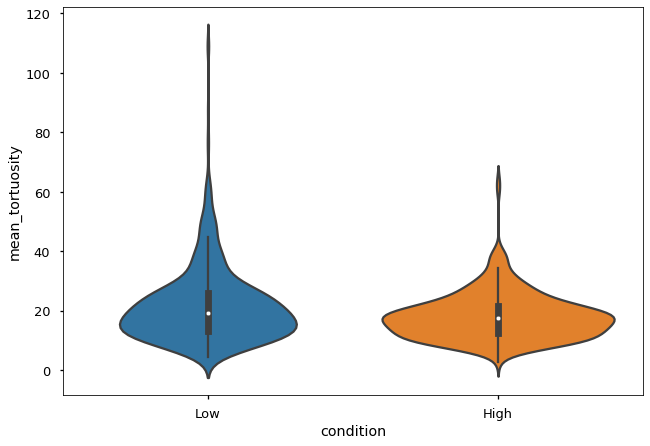

In [17]:
#need to add the original values to ground these comparisons

sns.violinplot(x="condition", y="mean_tortuosity",
                    data= new_df)
# sns.swarmplot(x="condition", y="mean_tortuosity",
#                     data=new_df, color="0.2")

In [18]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
stats.f_oneway(low, high)

F_onewayResult(statistic=0.5288768774881817, pvalue=0.467255087189686)

In [19]:
new_df

,name,std_tortuosity,mean_tortuosity,condition,visit_number
0,L0.1_c-3_m10_0_20377,13.805783,16.326246,Low,0
1,L0.1_c-3_m10_1_39912,23.408382,23.166319,Low,1
2,L0.1_c-3_m10_2_67784,5.213472,6.135550,Low,2
3,L0.1_c-3_m10_3_68158,20.745134,10.927886,Low,3
4,L0.1_c-3_m12_0_26059,24.265346,19.964931,Low,0
...,...,...,...,...,...
966,L50_c-3_m9_3_42157,20.134790,19.902202,High,3
967,L50_c-3_m9_4_53412,16.580625,15.099851,High,4
968,L50_c-3_m9_5_55397,11.713367,9.358874,High,5
969,L50_c-3_m9_6_64992,9.714835,9.555164,High,6
